# Лабораторная работа №3

Выполнил студент группы М8О-103М-20 Ларин Антон

Импорт необходимых библиотек и установка настроек вывода данных:

In [2]:
import numpy as np
import sys
import scipy.spatial
import matplotlib.pyplot as plt
from numpy.lib import stride_tricks
np.set_printoptions(linewidth=200, precision=3, threshold=256)

Дан вектор [1, 2, 3, 4, 5], построить новый вектор с тремя нулями между каждым значением

In [77]:
a = np.arange(5) + 1
az = np.zeros(len(a) + (len(a) - 1) * 3)
az[::len(a) - 1] = a
print(az)

[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0. 5.]


Поменять 2 строки в матрице

In [13]:
a = np.arange(9).reshape(3,3)
print(a)
a[[0,2]] = a[[2,0]]
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[6 7 8]
 [3 4 5]
 [0 1 2]]


Рассмотрим набор из 10 троек, описывающих 10 треугольников (с общими вершинами), найти множество уникальных отрезков, составляющих все треугольники

In [23]:
triangles = np.random.randint(0,10,(10,3))
print(triangles)
#повторяем дважды каждый элемент массива и сдвигаем влево на 1
temp = np.roll(triangles.repeat(2,axis=1),-1,axis=1)
pairs = temp.reshape(len(temp)*3,2)
pairs = np.sort(pairs,axis=1)
#сортируем пары точек (отрезки) от большего к меньшему
pairs = pairs.view( dtype=[('vertex1',pairs.dtype),('vertex2',pairs.dtype)] )
print(np.unique(pairs))

[[9 8 1]
 [4 3 9]
 [3 3 9]
 [7 3 7]
 [2 5 0]
 [4 0 6]
 [8 7 5]
 [4 0 6]
 [0 1 1]
 [1 6 1]]
[(0, 1) (0, 2) (0, 4) (0, 5) (0, 6) (1, 1) (1, 6) (1, 8) (1, 9) (2, 5) (3, 3) (3, 4) (3, 7) (3, 9) (4, 6) (4, 9) (5, 7) (5, 8) (7, 7) (7, 8) (8, 9)]


Дан массив C; создать массив A, что np.bincount(A) == C

In [17]:
c = np.random.randint(0, 10, 5)
print(c)
a = np.repeat(np.arange(len(c)), c)
print(a)
print((np.bincount(a) == c).all())

[3 5 4 2 6]
[0 0 0 1 1 1 1 1 2 2 2 2 3 3 4 4 4 4 4 4]
True


Посчитать среднее, используя плавающее окно

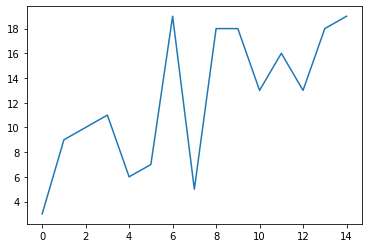

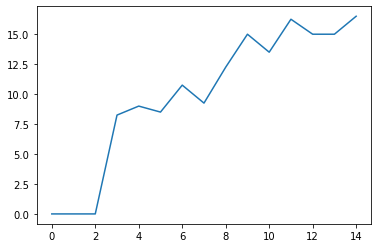

In [7]:
n = 4
a = np.random.randint(0, 20, 15)
plt.plot(a)
plt.show()

ma = np.cumsum(a)
ma[n:] -= ma[:-n]
result = np.concatenate((np.repeat(0, n - 1), ma[n - 1:] / n))
plt.plot(result)
plt.show()

Дан вектор Z, построить матрицу, первая строка которой (Z[0],Z[1],Z[2]), каждая последующая сдвинута на 1 (последняя (Z[-3],Z[-2],Z[-1]))

In [25]:
z = np.arange(10)
k = 3
zm = stride_tricks.as_strided(z,
                              shape=(z.size - k + 1, k),
                              strides=(z.itemsize, z.itemsize)
)
print(zm)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


Инвертировать булево значение, или поменять знак у числового массива без создания нового

In [23]:
a = np.random.randint(0,2,10).astype(bool)
print(a)
print(np.logical_not(a).astype(bool))

a = np.random.uniform(-5, 5, 10)
print(a)
print(np.negative(a))

[False  True False  True False False  True False  True False]
[ True False  True False  True  True False  True False  True]
[-2.858  2.149 -2.05   2.288 -0.294 -2.003 -4.714 -0.248 -1.251  1.172]
[ 2.858 -2.149  2.05  -2.288  0.294  2.003  4.714  0.248  1.251 -1.172]


Посчитать ранг матрицы

In [31]:
a = np.array([[2, 3, 7, 11], [1, 2, 4, 7], [5, 0, 10, 5]])
print(a)
print(np.linalg.matrix_rank(a))

[[ 2  3  7 11]
 [ 1  2  4  7]
 [ 5  0 10  5]]
2


Найти наиболее частое значение в массиве

In [38]:
a = np.random.randint(0,10,10)
print(a)
print(np.bincount(a).argmax())

[0 8 7 6 3 7 3 1 3 6]
3


Извлечь все смежные 3x3 блоки из 10x10 матрицы

In [88]:
a = np.random.randint(0, 10, (10, 10))
print(a)
n = 3
subBlocks = stride_tricks.as_strided(
    a, 
    shape=(a.shape[0] - n + 1, a.shape[1] - n + 1, n, n), 
    strides=a.strides + a.strides)
print(subBlocks)

[[6 8 5 9 1 6 8 9 6 6]
 [2 9 2 8 8 6 9 6 3 9]
 [6 4 7 2 5 3 1 0 7 7]
 [5 5 9 7 4 7 5 7 5 7]
 [5 2 1 6 8 5 1 0 9 0]
 [0 5 2 5 6 2 6 1 6 7]
 [2 6 9 9 1 5 9 0 0 2]
 [9 4 2 7 7 4 1 3 8 3]
 [5 6 4 0 0 3 4 6 4 7]
 [5 0 2 6 6 2 9 6 2 4]]
[[[[6 8 5]
   [2 9 2]
   [6 4 7]]

  [[8 5 9]
   [9 2 8]
   [4 7 2]]

  [[5 9 1]
   [2 8 8]
   [7 2 5]]

  ...

  [[6 8 9]
   [6 9 6]
   [3 1 0]]

  [[8 9 6]
   [9 6 3]
   [1 0 7]]

  [[9 6 6]
   [6 3 9]
   [0 7 7]]]


 [[[2 9 2]
   [6 4 7]
   [5 5 9]]

  [[9 2 8]
   [4 7 2]
   [5 9 7]]

  [[2 8 8]
   [7 2 5]
   [9 7 4]]

  ...

  [[6 9 6]
   [3 1 0]
   [7 5 7]]

  [[9 6 3]
   [1 0 7]
   [5 7 5]]

  [[6 3 9]
   [0 7 7]
   [7 5 7]]]


 [[[6 4 7]
   [5 5 9]
   [5 2 1]]

  [[4 7 2]
   [5 9 7]
   [2 1 6]]

  [[7 2 5]
   [9 7 4]
   [1 6 8]]

  ...

  [[3 1 0]
   [7 5 7]
   [5 1 0]]

  [[1 0 7]
   [5 7 5]
   [1 0 9]]

  [[0 7 7]
   [7 5 7]
   [0 9 0]]]


 ...


 [[[0 5 2]
   [2 6 9]
   [9 4 2]]

  [[5 2 5]
   [6 9 9]
   [4 2 7]]

  [[2 5 6]
   [9 9 1]
   [2 7 7]]



Рассмотрим множество матриц (n,n) и множество из p векторов (n,1). Посчитать сумму p произведений матриц (результат имеет размерность (n,1))

In [57]:
p, n = 5, 10
matricesArray = np.ones((p,n,n))
vectorsArray = np.ones((p,n))
print(matricesArray)
print(vectorsArray)
prodArray = np.einsum('ijk,ik->k', matricesArray, vectorsArray)
print(prodArray)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[50. 50. 50. 5

Дан массив 16x16, посчитать сумму по блокам 4x4

In [87]:
a = np.random.randint(0, 3, (16, 16))
print(a)
n = 4
subBlocks = stride_tricks.as_strided(
    a, 
    shape=(a.shape[0] - n + 1, a.shape[1] - n + 1, n, n), 
    strides=a.strides + a.strides
)
print(np.sum(subBlocks, axis = (-2, -1)))

[[2 2 0 0 1 0 0 2 1 0 0 0 1 0 0 2]
 [1 1 1 0 0 1 0 2 1 1 1 1 2 2 1 2]
 [2 0 2 0 0 2 0 2 0 0 0 0 2 1 1 1]
 [2 1 0 1 1 1 0 0 2 0 0 1 0 2 2 0]
 [1 0 1 2 0 2 2 0 0 0 2 0 2 1 1 2]
 [2 0 0 0 2 2 0 2 1 0 1 0 0 0 0 2]
 [0 2 2 1 2 1 2 2 1 0 1 1 2 1 2 0]
 [2 0 2 2 2 1 2 2 0 1 2 0 0 0 0 1]
 [0 1 0 1 0 1 0 2 0 1 0 0 0 1 0 0]
 [0 0 0 1 1 1 2 1 1 0 1 0 1 0 2 2]
 [2 2 1 2 1 1 1 0 1 0 2 0 0 0 2 0]
 [0 1 1 2 2 1 0 1 0 0 0 2 0 2 1 0]
 [2 2 0 2 1 2 1 2 0 0 2 0 1 0 0 1]
 [0 0 0 2 0 2 2 0 1 0 0 1 2 0 1 0]
 [0 1 1 2 1 1 0 2 1 0 2 0 1 1 0 1]
 [0 1 1 1 0 0 0 2 0 1 0 2 2 0 0 2]]
[[15 10 10  7 12 14 11 12  8  9 13 16 19]
 [15 10 14 12 13 15 10 11  9 12 17 19 22]
 [14 10 16 15 16 16  9 10  7  8 12 13 17]
 [15 15 18 19 19 18 12 12 10 10 14 15 17]
 [17 18 22 23 24 20 15 15 10 12 13 10 14]
 [15 17 19 19 23 19 16 16  9  9  9  7  9]
 [14 17 18 20 22 19 17 15  9 10 10 10 12]
 [16 16 17 19 18 16 14 14  9  8  7  6  9]
 [14 16 16 17 15 13 10 10  8  7  9 11 11]
 [18 19 19 21 18 15 10 11  9  9 11 11 12]
 [19 19 20 22 17 15

Найти n наибольших значений в массиве

In [197]:
n = 5
a = np.random.randint(0,100,10)
print(a)
print (a[np.argpartition(a, n)][len(a) - n:])

[74 93 98 26 88 10 58 24 48  2]
[58 74 93 98 88]


Построить прямое произведение массивов (все комбинации с каждым элементом)

In [170]:
a = [[np.random.randint(0, 5, 3)] for i in range(2)]
print(a)
print(np.array(np.meshgrid(a[0], a[1])).T.reshape(-1, 2))

[[array([4, 1, 3])], [array([3, 0, 2])]]
[[4 3]
 [4 0]
 [4 2]
 [1 3]
 [1 0]
 [1 2]
 [3 3]
 [3 0]
 [3 2]]


Даны 2 массива A (8x3) и B (2x2). Найти строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B

In [174]:
a = np.random.randint(0,5,(8,3))
b = np.random.randint(0,5,(2,2))
print(a)
print(b)
c = (a[..., np.newaxis, np.newaxis] == b)
rows = np.where(c.any((1,3)).all(1))[0]
print(a[rows])

[[0 0 3]
 [2 4 0]
 [0 1 3]
 [3 3 2]
 [0 4 2]
 [2 1 4]
 [4 0 0]
 [3 4 4]]
[[0 4]
 [3 1]]
[[0 0 3]
 [0 1 3]
 [2 1 4]
 [3 4 4]]


Дана 10x3 матрица, найти строки из неравных значений (например [2,2,3])

In [101]:
a = np.random.randint(0, 3, (10, 3))
print(a)
print(a[~np.logical_and.reduce(a[:,1:] == a[:,:-1], axis=1)])

[[0 1 1]
 [2 1 2]
 [2 2 2]
 [0 2 0]
 [2 0 0]
 [2 2 1]
 [2 0 2]
 [0 0 1]
 [2 2 2]
 [2 2 2]]
[[0 1 1]
 [2 1 2]
 [0 2 0]
 [2 0 0]
 [2 2 1]
 [2 0 2]
 [0 0 1]]


Преобразовать вектор чисел в матрицу бинарных представлений

In [27]:
a = np.random.randint(0, 64, 5, dtype=np.uint8)
print(a)
print(np.unpackbits(a).reshape(-1, 8))

[31  8 42 60 38]
[[0 0 0 1 1 1 1 1]
 [0 0 0 0 1 0 0 0]
 [0 0 1 0 1 0 1 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 0 0 1 1 0]]


Дан двумерный массив. Найти все различные строки

In [104]:
a = np.random.randint(0, 3, (10, 3))
print(a)
print(np.unique(a, axis = 0))

[[2 2 2]
 [1 0 2]
 [1 1 2]
 [0 2 1]
 [2 1 0]
 [1 1 0]
 [0 2 1]
 [1 1 0]
 [1 1 2]
 [0 2 1]]
[[0 2 1]
 [1 0 2]
 [1 1 0]
 [1 1 2]
 [2 1 0]
 [2 2 2]]


Даны векторы A и B, написать einsum эквиваленты функций inner, outer, sum и mul

In [216]:
a, b = np.arange(5), np.arange(5) + 5
print(a)
print(b)
print("inner:")
print(np.einsum("i,i->", a, b))
print("outer:")
print(np.einsum("i,j->ij", a, b))
print("sum:")
print(np.einsum("i->", a), np.einsum("i->", b))
print("mul:")
print(np.einsum("i,i->i", a, b))

[0 1 2 3 4]
[5 6 7 8 9]
inner:
80
outer:
[[ 0  0  0  0  0]
 [ 5  6  7  8  9]
 [10 12 14 16 18]
 [15 18 21 24 27]
 [20 24 28 32 36]]
sum:
10 35
mul:
[ 0  6 14 24 36]
